In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, spearmanr, kruskal
import seaborn as sbs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_curve, auc, precision_recall_curve


In [23]:
dataset= pd.read_csv("../lab1/AmesHousing.csv",sep='\t')
dataset.head()
dataset.shape


(2930, 82)

In [24]:
localCopy=dataset.copy(deep=True)

In [25]:

for column in localCopy:
    if localCopy[column].isna().sum()>2000:
        print(column)
        localCopy.drop(column, axis=1, inplace=True)



Alley
Pool QC
Fence
Misc Feature


In [26]:
#SEPARATION OF CATEGORICAL AND NUMERICAL FEATURES

#AmesExplanations.txt indicates a separation of the data in 4 types:
# Continuous - numerical
# Nominal - categorical
# Ordinal - usually categorical, numerical if order matters
# Discrete - usually numerical, categorical if it's an ID

cat_features = ['MS SubClass','MS Zoning','Street',
                'Lot Shape','Land Contour','Utilities','Lot Config',
                'Land Slope','Neighborhood','Condition 1','Condition 2',
                'Bldg Type','House Style','Roof Style','Roof Matl',
                'Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation',
                'Heating','Central Air','Electrical','Garage Type',
                'Paved Drive','Misc Feature','Sale Condition']

num_features = ['Lot Frontage','Lot Area','Overall Qual','Overall Cond',
                'Year Built','Year Remod/Add','Mas Vnr Area','Exter Qual',
                'Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
                'BsmtFin Type 1', 'BsmtFin SF 1','BsmtFinType 2','BsmtFin SF 2',
                'Bsmt Unf SF','Total Bsmt SF','HeatingQC','1st Flr SF','2nd Flr SF',
                'Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath',
                'Full Bath','Half Bath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd',
                'Functional','Fireplaces','FireplaceQu',
                'Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual',
                'Garage Cond','Wood Deck SF','Open Porch SF','Enclosed Porch','3-Ssn Porch',
                'Screen Porch','Pool Area','Misc Val','Mo Sold','Yr Sold',
                'Sale Type']


# Features that describe a grade (ex. Quality: 1-10 or Poor/Average/Excellent) will be treated as
# numeric values. There are string values as well; these will be mapped to numbers so that the model
# understands them

# to be mapped to numbers: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure,
# BsmtFin Type 1, BsmtFinType 2, HeatingQC, KitchenQual, Functional, FireplaceQu, 
# Garage Finish, Garage Qual, Garage Cond, Pool QC, Fence, Sale Type

ordinal_maps = {'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Qual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Cond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Exposure': {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
                'BsmtFin Type 1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'BsmtFin Type 2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'Heating QC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Kitchen Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
                'Fireplace Qu': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Garage Finish': {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
                'Garage Qual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Garage Cond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Sale Type': { 'Oth': 1,'ConLw': 2,'ConLD': 3,'COD': 4,'VWD': 5,'WD': 6,'ConLI': 7,'CWD': 8,'Con': 9,'New': 10}
                }

In [27]:
#dropping the PID , Order Column
# Yr Sold, Year Built, Total Bsmt SF, Gr Liv Area because they have a high correlation with other features, we are gonna keep them 
#and delete the others

localCopy.drop(columns=['PID','Order','Overall Qual', 'Garage Yr Blt', '1st Flr SF','TotRms AbvGrd', 'Garage Cars'],inplace=True)
print("success")

localCopy.drop(index=[1341,1497,1577,2236],inplace=True)



success


In [28]:

numerical_data=localCopy.select_dtypes(include=['int64','float64'])
for col in numerical_data:
    sk=skew(localCopy[col],nan_policy='omit')
    if sk>2:
        print(f"Coloana: {col} - old skew:{sk}")
        localCopy[col] = np.log1p(localCopy[col])
        sk_new=skew(localCopy[col],nan_policy='omit')
        print(f"New skewness: {sk_new}")


Coloana: Lot Area - old skew:12.921303469227428
New skewness: -0.5095875310432157
Coloana: Mas Vnr Area - old skew:2.603491982924756
New skewness: 0.5264593607636521
Coloana: BsmtFin SF 2 - old skew:4.135410329257939
New skewness: 2.4466341889767427
Coloana: Low Qual Fin SF - old skew:12.103527135147226
New skewness: 8.568361293635881
Coloana: Bsmt Half Bath - old skew:3.93718133741119
New skewness: 3.7801965849020207
Coloana: Kitchen AbvGr - old skew:4.3082140011430115
New skewness: 3.5254820902756743
Coloana: Open Porch SF - old skew:2.52933331628121
New skewness: -0.048250527296802785
Coloana: Enclosed Porch - old skew:4.0215428942506435
New skewness: 1.968726950467564
Coloana: 3Ssn Porch - old skew:11.390000331552061
New skewness: 8.836234926770304
Coloana: Screen Porch - old skew:3.9522623903942686
New skewness: 2.950574273376792
Coloana: Pool Area - old skew:16.918788619044786
New skewness: 15.01654640609462
Coloana: Misc Val - old skew:21.973503763808235
New skewness: 5.22090435

In [29]:
localCopy.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck 

In [30]:
print(skew(localCopy['SalePrice'],nan_policy='omit')) #old skewness salePrice

1.7439758295442118


Information of the target variable: 
{'mean': np.float64(180810.0980861244), 'median': np.float64(160000.0), 'max': np.int64(755000), 'min': np.int64(12789)}


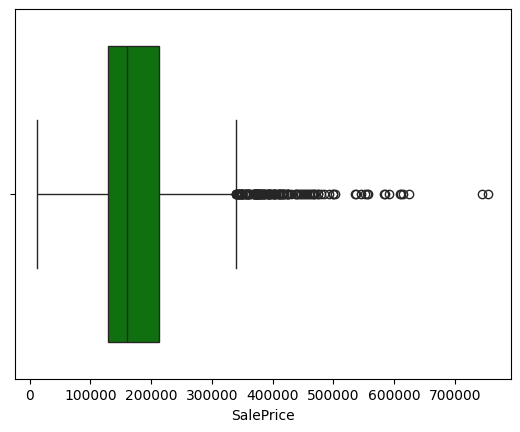

[160000 160000]
1465 1461
Q1: 129500.0
Q2: 160000.0
Q3: 213500.0
min:12789
max: 755000
(2926, 71)


In [31]:
#Separate the target variable from the rest
indexOfTV = localCopy.columns.get_loc("SalePrice")
X = localCopy.iloc[:,:indexOfTV]  #all rows and all columns except for the TV column
Y = localCopy.iloc[:,indexOfTV]  #column of the Target Variable with all the rows (":")


infos = {}
infos['mean'] = np.mean(np.array(Y))
infos['median'] = np.median(np.array(Y))
infos['max'] = np.max(np.array(Y))
infos['min'] = np.min(np.array(Y))
print(f"Information of the target variable: \n{infos}")

sbs.boxplot(x=Y, vert=False, color='green')
plt.show()

# compute the quartiles 
# step 1: copy/sort the data
Y_copy = Y.copy(deep=True).sort_values(ascending=True)
length = len(Y_copy)
# a ranges vector that defines the classes: e.g. for the class 1 we must look up to be between the 
# ranges[0] and ranges[1] => for each class 'i' the range is defined by (ranges[i-1], ranges[i])
ranges = [infos['min'], -1, -1, -1, infos['max']]

# length is even then:
# Q2 = mean(length/2, length/2-1)
Q2 = np.mean(np.array(Y_copy.iloc[(length//2)-1:length//2+1]))
print(np.array(Y_copy.iloc[(length//2)-1:length//2+1]))
# split the Series and compute the Q1, Q3
cond = Y_copy <= Q2
half1, half2 = Y_copy[cond], Y_copy[~cond]
print(len(half1), len(half2))
Q1 = np.median(np.array(half1))
Q3 = np.median(np.array(half2))
print(f"Q1: {Q1}\nQ2: {Q2}\nQ3: {Q3}\nmin:{infos['min']}\nmax: {infos['max']}") 
ranges[1] = Q1
ranges[2] = Q2 
ranges[3] = Q3

# change the target varaible to a categorical format
classes = ["cheap", "affordable", "expensive", "billionaire type of shit"]
cat_y: list[str] = []
for y in Y:
    if y <= ranges[1]:
        cat_y.append(classes[0])
    elif y <= ranges[2]:
        cat_y.append(classes[1])
    elif y <= ranges[3]:
        cat_y.append(classes[2])
    else:
        cat_y.append(classes[3])

print(localCopy.shape)
Y = pd.Series(cat_y)


In [32]:

#FEATURE ENGINEERING: Scaling

from sklearn.preprocessing import MinMaxScaler

# Vrem sa scalam
# Problema in datasetul nostru: avem si stringuri ex. "RL","RM" care nu se pot scala
# Solutie: aplicam numai pt coloanele cu numere

numerical_data = X.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
scaled_data = X.copy(deep=True)
scaled_data[numerical_data] = scaler.fit_transform(X[numerical_data])

X = scaled_data



In [33]:
# Label encoding of the ordinal features
import math

# finding all the categories per each feature to be able to encode them 
# find them dynamically so in case of a dataset change the code adapts itself
ords = {}
ords_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Sale Type']
for col in ords_cols:
    categories_withNaN = set(X[col])
    categories_withoutNaN = set(x for x in X[col] if not (isinstance(x, float) and math.isnan(x)))
    if len(categories_withoutNaN) != len(categories_withNaN):
        ords[col] = [*categories_withoutNaN, np.nan]
    else:
        ords[col] = [*categories_withoutNaN]
print(ords)

from sklearn.preprocessing import OrdinalEncoder

# for the record to see if we have NaN values so we could handle it
for col in list(ords.keys()):
    print(f"{col}: {X[col].isna().sum()}")


# Printing the set of the categories and their encoded relatives
for col, ordering in ords.items():
    enc = OrdinalEncoder(categories=[ordering], encoded_missing_value=-1)
    X[col] = enc.fit_transform(X[[col]])
    print(f"{set(X[col])}\n{ordering}\n\n")


enc = OrdinalEncoder(categories=[classes])

Y = enc.fit_transform(pd.DataFrame(Y))
Y = pd.DataFrame(Y)
Y


{'Exter Qual': ['Fa', 'TA', 'Gd', 'Ex'], 'Exter Cond': ['TA', 'Ex', 'Po', 'Fa', 'Gd'], 'Bsmt Qual': ['TA', 'Ex', 'Po', 'Fa', 'Gd', nan], 'Bsmt Cond': ['TA', 'Ex', 'Po', 'Fa', 'Gd', nan], 'Bsmt Exposure': ['Av', 'No', 'Mn', 'Gd', nan], 'BsmtFin Type 1': ['BLQ', 'Rec', 'LwQ', 'ALQ', 'Unf', 'GLQ', nan], 'BsmtFin Type 2': ['BLQ', 'Rec', 'LwQ', 'ALQ', 'Unf', 'GLQ', nan], 'Heating QC': ['TA', 'Ex', 'Po', 'Fa', 'Gd'], 'Kitchen Qual': ['TA', 'Ex', 'Po', 'Fa', 'Gd'], 'Functional': ['Typ', 'Maj1', 'Sev', 'Sal', 'Mod', 'Maj2', 'Min2', 'Min1'], 'Fireplace Qu': ['TA', 'Ex', 'Po', 'Fa', 'Gd', nan], 'Garage Finish': ['Unf', 'RFn', 'Fin', nan], 'Garage Qual': ['TA', 'Ex', 'Po', 'Fa', 'Gd', nan], 'Garage Cond': ['TA', 'Ex', 'Po', 'Fa', 'Gd', nan], 'Sale Type': ['ConLI', 'New', 'COD', 'Oth', 'ConLw', 'ConLD', 'VWD', 'CWD', 'WD ', 'Con']}
Exter Qual: 0
Exter Cond: 0
Bsmt Qual: 78
Bsmt Cond: 78
Bsmt Exposure: 81
BsmtFin Type 1: 78
BsmtFin Type 2: 79
Heating QC: 0
Kitchen Qual: 0
Functional: 0
Fireplace Qu

,0
0,3.0
1,0.0
2,2.0
3,3.0
4,2.0
...,...
2921,1.0
2922,1.0
2923,1.0
2924,2.0


In [34]:
# One-Hot Encoding for the rest of the categorical variables
from sklearn.preprocessing import OneHotEncoder

unencoded_cols = X.select_dtypes(include=['object']).columns.tolist()
enc = OneHotEncoder(sparse_output=False)
oneh_encoded = enc.fit_transform(X[unencoded_cols])
oneh_df = pd.DataFrame(oneh_encoded, columns=enc.get_feature_names_out(unencoded_cols))
X = pd.concat([X, oneh_df], axis=1)
X = X.drop(unencoded_cols, axis=1)
X.drop([1341,1497,1577, 2236], axis=0, inplace=True)
# check if there are any categorical columns
X.select_dtypes(include=['object']).columns.tolist()

[]

In [35]:
Y

,0
0,3.0
1,0.0
2,2.0
3,3.0
4,2.0
...,...
2921,1.0
2922,1.0
2923,1.0
2924,2.0


In [36]:
# XGBoost 
import xgboost as xgb
from xgboost import XGBClassifier


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = XGBClassifier(
    num_class=len(set(Y)), 
    eval_metric='mlogloss',
    max_depth=4,
    learning_rate=0.05,
    n_estimators=400,
    random_state=42
)

model.fit(X_train, Y_train)


X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.1, random_state=42)

model2 = XGBClassifier(
    num_class=len(set(Y)), 
    eval_metric='mlogloss',
    max_depth=5,
    learning_rate=0.05,
    n_estimators=400,
    random_state=42
)

model2.fit(X_train2, Y_train2)

# predicting 
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test2)
print(f" F1 of prediction model 1: {f1_score(Y_test, y_pred, average="weighted")}")
print(f" F1 of prediction model 2: {f1_score(Y_test2, y_pred2, average="weighted")}")
print(f" Accuracy of prediction model 1: {accuracy_score(Y_test, y_pred)}")
print(f" Accuracy of prediction model 2: {accuracy_score(Y_test2, y_pred2)}")



#best model until now is k-fold=0.1
#de ce daca scad learning rate-ul la n_estimators=400 la k-fold=0.2 scade accuracy?
#de ce daca trec un anumit prag si la max_depth accuracy scade?
#daca adaugam date creste mult precision, adica se observa o diferenta destul de mare daca folosesc doar 10% pentru testing 

 F1 of prediction model 1: 0.7905268279041904
 F1 of prediction model 2: 0.8264804940617528
 Accuracy of prediction model 1: 0.7901023890784983
 Accuracy of prediction model 2: 0.825938566552901


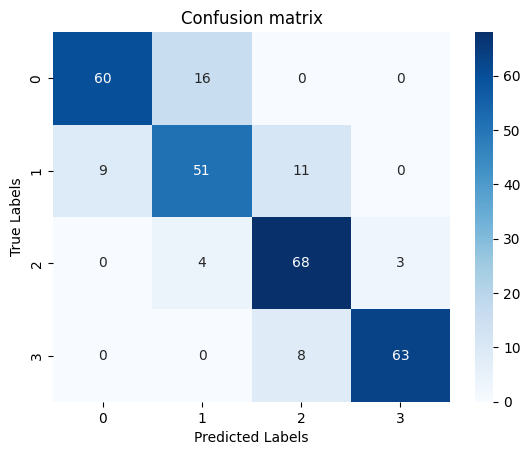

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test2, y_pred2)
sbs.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')
plt.show()


In [38]:
# lightgbm trainning
import lightgbm as lgbm
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

params = {
    "objective": "multiclass",
    "num_class": 4,
    "learning_rate": 0.05,
    "metric": "multi_logloss",
    "num_leaves": 20
    
}
xgb_device="cuda"
num_round = 100
# print(len(set(Y)))

train_data = lgbm.Dataset(X_train, label=Y_train)
test_data = lgbm.Dataset(X_test, label=Y_test, reference=train_data)

light_model = lgbm.train(params, train_data, num_round, valid_sets=[test_data])

y_pred = light_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print('\n\n')
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
print(f"F1 Score: {f1_score(Y_test, y_pred, average=None)}")
print(f"Recall Score: {recall_score(Y_test, y_pred, average=None)}")
print(f"Precision Score: {precision_score(Y_test, y_pred, average=None)}")


#increasing the number of trees doesn't help here=>  why??
#decreasing learning rate => increasing the accuracy
#decreasing the num_leaves to 20 => better accuracy, maybe with 31 too much features to take into consideration
#in contrast with what does xgb boost, light gbm uses leaf-wise growth, xgb boost uses level-wise growth

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3524
[LightGBM] [Info] Number of data points in the train set: 2633, number of used features: 164
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.380614
[LightGBM] [Info] Start training from score -1.389718
[LightGBM] [Info] Start training from score -1.389718
[LightGBM] [Info] Start training from score -1.385156



Accuracy: 0.8191126279863481
F1 Score: [0.84       0.71830986 0.81528662 0.90510949]
Recall Score: [0.82894737 0.71830986 0.85333333 0.87323944]
Precision Score: [0.85135135 0.71830986 0.7804878  0.93939394]


In [39]:
#--------------------------------------------------------------------------------------------
# LAB 3

# Optuna Bayesian Optimisation: incercam intr-un numar dat de trialuri valori diferite
# pt niste hiperparametrii alesi.
# Pt Optuna, ne facem o functie (objective) in care se antreneaza modelul xgb. Functia e apelata 
# in fiecare trial si returneaza o valoare (aici: accuracy).
# Optuna schimba valorile hiperparametrilori alesi ca sa ajunga la un return al functiei mai preferabil

# Optuna Artifact Store Setup
import optuna.artifacts as art
import os
import pickle


base_path = "./Optuna_Artifacts"
os.makedirs(base_path, exist_ok=True)
artifact_store = art.FileSystemArtifactStore(base_path=base_path)


def objective(trial):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    
    dtrain = xgb.DMatrix(X_train, label=Y_train)
    dvalid = xgb.DMatrix(X_test, label=Y_test)

    param = {
    "objective": "multi:softprob",  # returns probabilities for each class (ex. [0.2, 0.5, 0.1, 0.2]; explicatie mai buna jos unde i y_pred_tuned)
    "eval_metric": "mlogloss",      # multi-class log loss
    "num_class": 4,                 # total number of classes
    "verbosity": 0,



    "max_depth":trial.suggest_int("max_depth", 3,10),
    "learning_rate":trial.suggest_float("learning_rate",0.05,0.1),
    "min_child_weight": trial.suggest_float("min_child_weight", 1, 3) ,  # controleaza minimul marimii unei frunze

    #Sampling
    "subsample": trial.suggest_float("subsample", 0.4, 1.0),   # nr randuri alese aleatoriu pt fiecare arbore
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),   # nr features alese aleatoriu pt fiecare arbore
    
    # # Regularization
    # "gamma": trial.suggest_float("gamma", 0, 1.0),
    # "reg_alpha": trial.suggest_float("reg_alpha", 0, 2),
    # "reg_lambda": trial.suggest_float("reg_lambda", 0, 2),
    
    
    # # Feature sampling at more granular levels
    # "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.4, 1.0),
    # "colsample_bynode": trial.suggest_float("colsample_bynode", 0.4, 1.0),
    
    
    # # Stability for imbalanced classes
    # "max_delta_step": trial.suggest_int("max_delta_step", 0, 10),


    "tree_method":"hist",
    "device":"cuda:0"
    
    
    }
    
    # unde apare trial.suggest_float: # ii spunem la optuna sa incerce pt hiperparametrii 
    # respectivi valori intre cele 2 numere (ex. 0.4 si 1.0)
    num_boost_round= trial.suggest_int("num_boost_round",100,500)

    gbm = xgb.train(param, dtrain,
        num_boost_round=num_boost_round,
        evals=[(dvalid, "validation")],
        early_stopping_rounds=30,
        verbose_eval=False,
        
    )

    preds = gbm.predict(dvalid)
    pred_labels = np.argmax(preds, axis=1)
    accuracy = accuracy_score(Y_test, pred_labels)


    model_filename = f"model_trial_{trial.number}.pickle"
    with open(model_filename, "wb") as f:
        pickle.dump(gbm, f)

    artifact_id = art.upload_artifact(
        artifact_store=artifact_store,
        file_path=model_filename,
        study_or_trial=trial,
    )
    trial.set_user_attr("model_artifact_id", artifact_id)
    os.remove(model_filename)




    return accuracy

In [40]:
# Pt optuna facem un obiect "study"; asta se va ocupa de hyperparameter tuning.
# In obiect se vor salva toate trial-urile, parametrii folositi per trial si scorurile 
# obtinute per trial.
import optuna
from optuna.samplers import TPESampler


study1 = optuna.create_study(
    direction="maximize",      # optuna cauta cea mai *mare* valoare pt ce vrem. ("ce vrem" - aici: accuracy (returnat de functia objective); in alta situatie, direction="minimize" se putea folosi de ex. pt loss function)
    sampler=TPESampler(seed=10),      # metoda eficienta care spune pe ce valori sa lucreze in urmatorul trial
    pruner=optuna.pruners.MedianPruner(),   # metoda de early stopping pt a economisi timp
    study_name="Lab3/ Experiment#1 ",       # numele care il dam obiectului
    load_if_exists=False ,     # la fiecare rulare creeaza un obiect nou; IMPORTANT pt ca daca rulezi mereu cu acelasi obiect inca un set de trialuri, tu mai ai si trialurile de inainte salvate care, daca ai schimbat ceva mai sus, sunt gresite
    storage='sqlite:///optuna_studies.db'

)

[I 2025-11-13 21:46:04,463] A new study created in RDB with name: Lab3/ Experiment#1 


In [41]:
optuna.study.get_all_study_names(storage="sqlite:///optuna_studies.db")


# optuna.delete_study(
#     study_name="Lab3/ Experiment#1 ",
#     storage="sqlite:///optuna_studies.db"
# )


['Lab3/#Experiment_MinimizeLoss', 'Lab3/ Experiment#1 ']

In [42]:
study1.enqueue_trial(
    {
        "learning_rate": 0.05,
        "num_estimarors": 400,
        "max_depth": 5,
    }
)





optuna.logging.set_verbosity(optuna.logging.WARN)
study1.optimize(objective, n_trials=100,show_progress_bar=True,n_jobs=-1, timeout=600)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# study2=optuna.create_study(
#     direction="minimize",
#     study_name="Lab3/#Experiment_MinimizeLoss",
#     storage="sqlite:///optuna_studies.db",
#     load_if_exists=False
# )

In [ ]:
#facem optimizare pentru loss function, de curiozitate


def objective(trial):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    
    dtrain = xgb.DMatrix(X_train, label=Y_train)
    dvalid = xgb.DMatrix(X_test, label=Y_test)

    param = {
    "objective": "multi:softprob",  # returns probabilities for each class (ex. [0.2, 0.5, 0.1, 0.2]; explicatie mai buna jos unde i y_pred_tuned)
    "eval_metric": "mlogloss",      # multi-class log loss
    "num_class": 4,                 # total number of classes
    "verbosity": 0,
    "max_depth":trial.suggest_int("max_depth", 3,10),
    "learning_rate":trial.suggest_float("learning_rate",0.05,0.3),
    "subsample": trial.suggest_float("subsample", 0.4, 1.0),   # nr randuri alese aleatoriu pt fiecare arbore
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),   # nr features alese aleatoriu pt fiecare arbore
    "min_child_weight": trial.suggest_float("min_child_weight", 1, 15),   # controleaza minimul marimii unei frunze
    "tree_method":"hist",
    "device":"cuda:0"
    
    }
    
    # unde apare trial.suggest_float: # ii spunem la optuna sa incerce pt hiperparametrii 
    # respectivi valori intre cele 2 numere (ex. 0.4 si 1.0)
    num_boost_round= trial.suggest_int("num_boost_round",100,800)

    gbm = xgb.train(param, dtrain,
        num_boost_round=num_boost_round,
        evals=[(dvalid, "validation")],
        early_stopping_rounds=30,
        verbose_eval=False,)

    loss=gbm.best_score

    return loss

In [43]:
print(study1.best_value)
print(study1.best_params)


0.8600682593856656
{'max_depth': 4, 'learning_rate': 0.08562307791305897, 'min_child_weight': 1.5623411727006187, 'subsample': 0.8995848964402307, 'colsample_bytree': 0.5932695804555583, 'num_boost_round': 201}


In [44]:
for trial in study1.trials:
    if "model_artifact_id" in trial.user_attrs:
        print(f"Trial {trial.number}: {trial.user_attrs['model_artifact_id']}")

Trial 0: abfd6964-d6b0-4f2c-9f09-7d0f5d4d0d6a
Trial 1: f4a68c03-d766-4aec-aedf-ae43e3f4bec1
Trial 2: a2114abd-3a88-445d-8403-5015957e83e2
Trial 3: a563cfd3-4bfb-40e6-a48c-d8f4481323a3
Trial 4: 48b7143f-6a37-4ae3-b422-6523121ab386
Trial 5: 0eeae527-72d2-471a-96a6-c33ff44773bf
Trial 6: d36e8441-fc8b-4a5b-9fee-e61845daa386
Trial 7: 19117315-12d3-4c28-8b8c-91871670dd24
Trial 8: 47bfe6e2-e74b-4958-891c-cc5c8ddd324e
Trial 9: b4fd790b-69e3-40c0-8733-9862b20c300a
Trial 10: b65a6076-7596-4249-bbc1-80ebfd3f6c33
Trial 11: b79a7530-4298-41ae-841a-f03a2199413c
Trial 12: 0c0d3a16-2944-403a-a4e0-2e8b6d4aeb5d
Trial 13: d33ff76f-956a-49a9-9e88-118d52dc798a
Trial 14: 918f4e29-93d5-478b-8128-b8c420d17841
Trial 15: e88d84b3-660c-46ac-a62f-64054f5e629a
Trial 16: 922e6a64-26f5-44dc-9a05-a69465e49b5e
Trial 17: 8d17b37b-721f-4123-869c-bbdc43b9a8e0
Trial 18: ada7adb4-4bd6-4be9-9b01-8b61405e672a
Trial 19: 5e4038e2-8d1d-4ce8-a0c8-5a1578575883
Trial 20: 0ae1af18-9ca2-4529-855b-e14fbcc27843
Trial 21: fd551615-4d54

In [46]:
#loading the models




first_trial=study1.trials[0]
last_trial=study1.trials[99]
middle_trial=study1.trials[len(study1.trials)//2]


first_artifact_id=first_trial.user_attrs['model_artifact_id']
middle_artifact_id = middle_trial.user_attrs['model_artifact_id']
last_artifact_id = last_trial.user_attrs['model_artifact_id']


art.download_artifact(
    artifact_store=artifact_store,
    artifact_id=first_artifact_id,
    file_path='first_model.pickle'
)

art.download_artifact(
    artifact_store=artifact_store,
    artifact_id=middle_artifact_id,
    file_path='middle_model.pickle'
)

art.download_artifact(
    artifact_store=artifact_store,
    artifact_id=last_artifact_id,
    file_path='last_model.pickle'
)


with open('first_model.pickle', 'rb') as f:
    first_model = pickle.load(f)
    
with open('middle_model.pickle', 'rb') as f:
    middle_model = pickle.load(f)
    
with open('last_model.pickle', 'rb') as f:
    last_model = pickle.load(f)








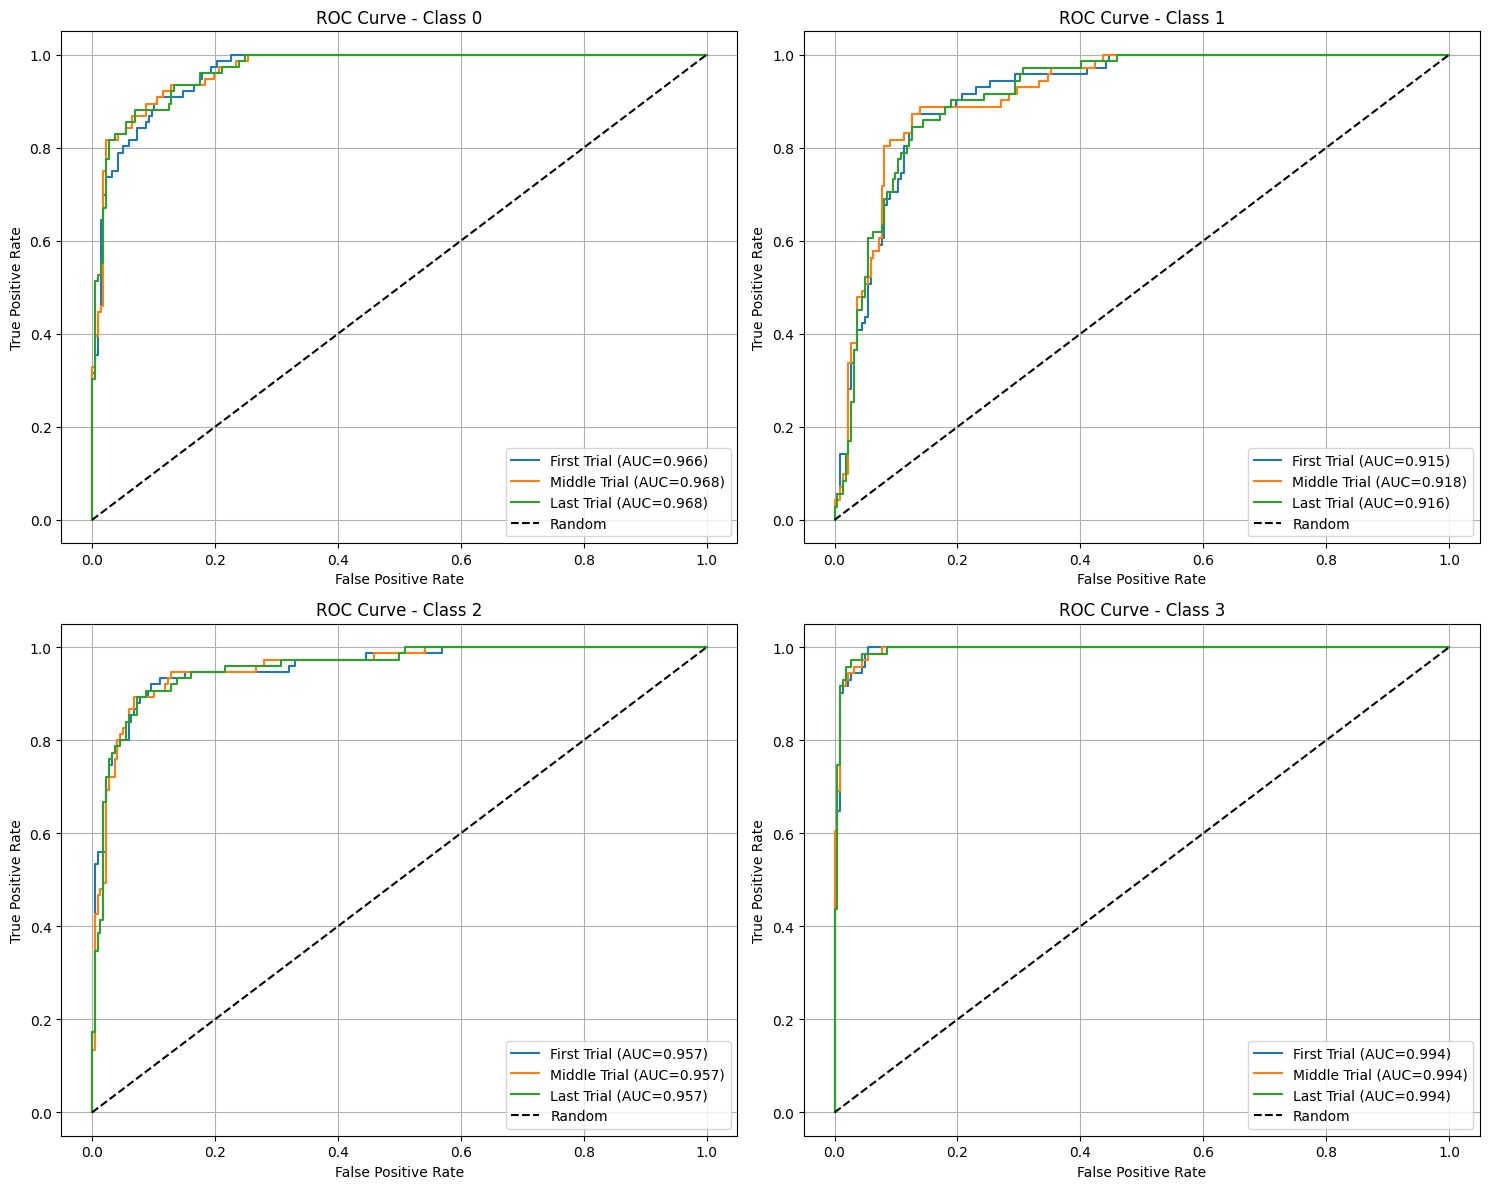

In [ ]:
## PLOTTING THE ROC CURVES FOR THE 4 classes
from sklearn.preprocessing import label_binarize



dtest = xgb.DMatrix(X_test)

first_preds = first_model.predict(dtest)
middle_preds = middle_model.predict(dtest)
last_preds = last_model.predict(dtest)



# Binarize the labels
y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3])
n_classes = 4

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for class_idx in range(n_classes):
    ax = axes[class_idx // 2, class_idx % 2]
    
    # First model
    fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], first_preds[:, class_idx])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'First Trial (AUC={roc_auc:.3f})')
    
    # Middle model
    fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], middle_preds[:, class_idx])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'Middle Trial (AUC={roc_auc:.3f})')
    
    # Last model
    fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], last_preds[:, class_idx])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'Last Trial (AUC={roc_auc:.3f})')
    
    ax.plot([0, 1], [0, 1], 'k--', label='Random')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - Class {class_idx}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig('roc_curves_comparison.png')
plt.show()

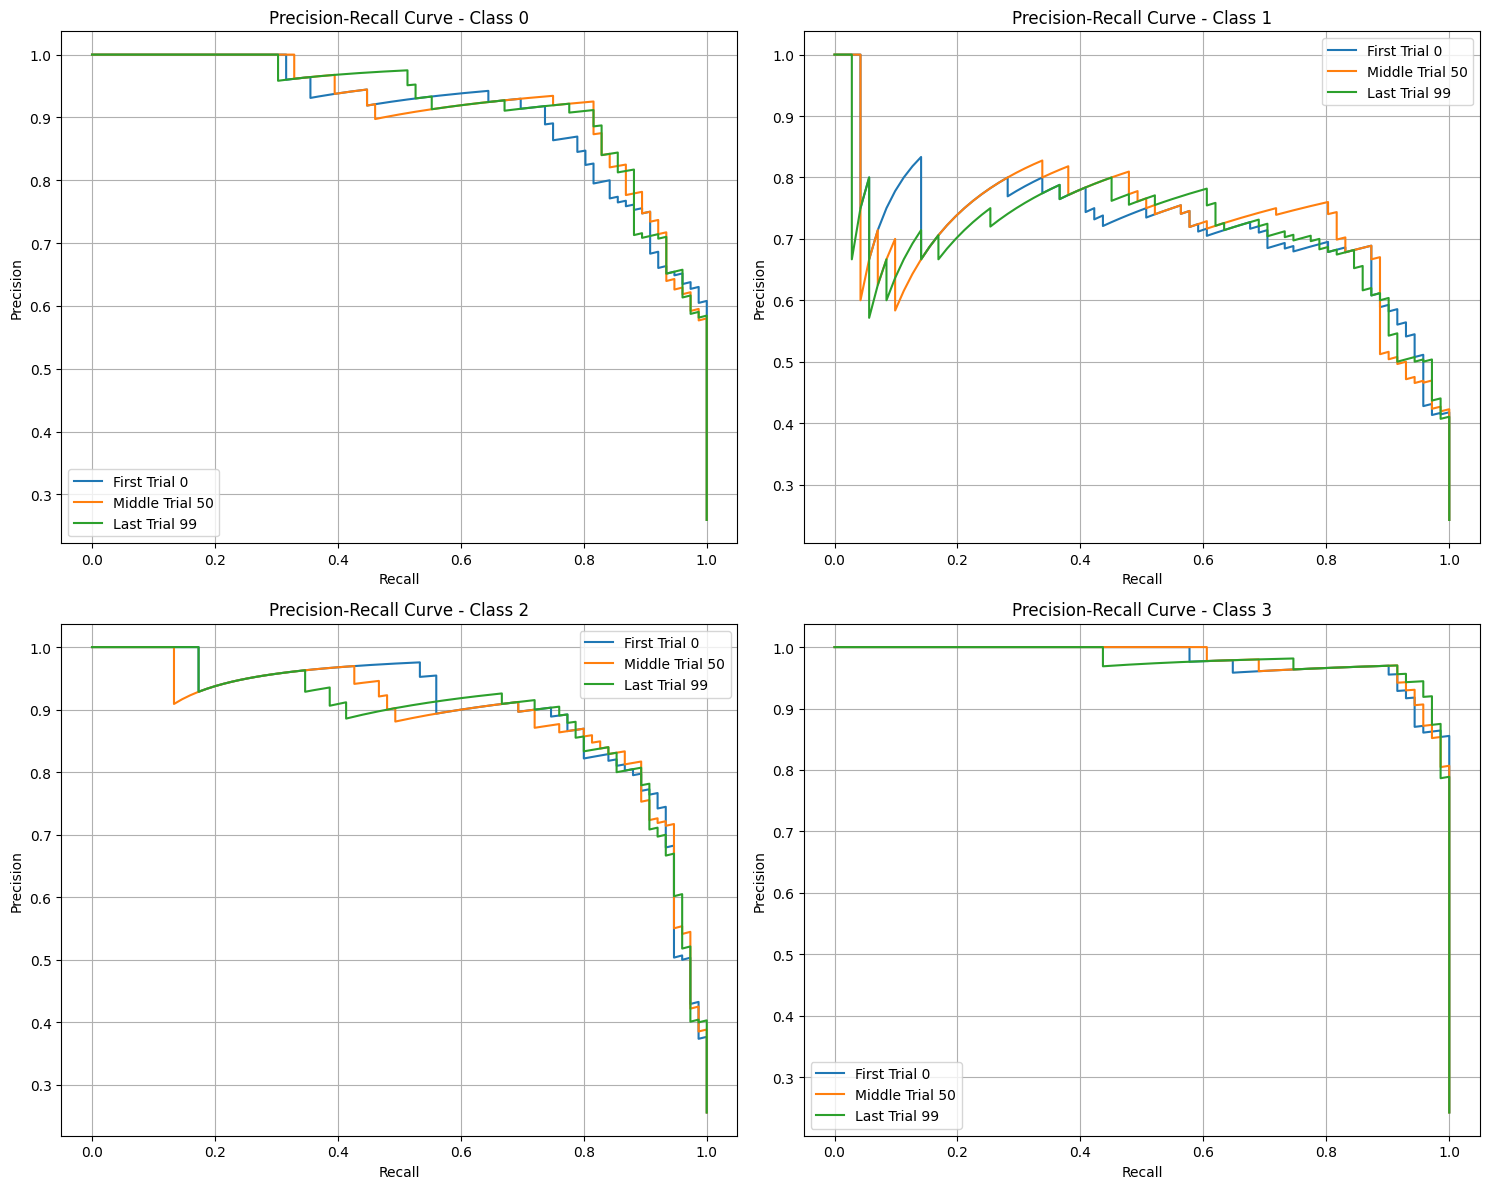

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for class_idx in range(n_classes):
    ax = axes[class_idx // 2, class_idx % 2]
    
    # First model
    precision, recall, _ = precision_recall_curve(y_test_bin[:, class_idx], first_preds[:, class_idx])
    ax.plot(recall, precision, label=f'First Trial {first_trial.number}')
    
    # Middle model
    precision, recall, _ = precision_recall_curve(y_test_bin[:, class_idx], middle_preds[:, class_idx])
    ax.plot(recall, precision, label=f'Middle Trial {middle_trial.number}')
    
    # Last model
    precision, recall, _ = precision_recall_curve(y_test_bin[:, class_idx], last_preds[:, class_idx])
    ax.plot(recall, precision, label=f'Last Trial {last_trial.number}')
    
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve - Class {class_idx}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print(study1.best_trial)

{'max_depth': 4, 'learning_rate': 0.08562307791305897, 'min_child_weight': 1.5623411727006187, 'subsample': 0.8995848964402307, 'colsample_bytree': 0.5932695804555583, 'num_boost_round': 201}


In [55]:
models = {
    'First': (first_model, first_trial),
    'Middle': (middle_model, middle_trial),
    'Last': (last_model, last_trial)
}


for model_name, (model, trial) in models.items():
    print(f"\n{model_name} Model (Trial {trial.number}):")
    print("-"*80)
    
    # Get predictions
    preds = model.predict(dtest)
    
    for class_idx in range(4):
        # Get precision, recall, and thresholds for this class
        precision, recall, thresholds = precision_recall_curve(
            y_test_bin[:, class_idx], 
            preds[:, class_idx]
        )
        
        # Calculate F1 score for each threshold
        # F1 = 2 * (precision * recall) / (precision + recall)
        # Avoid division by zero
        f1_scores = np.where(
            (precision + recall) == 0,
            0,
            2 * (precision * recall) / (precision + recall)
        )
        
        # Find the best F1 score and its index
        best_f1_idx = np.argmax(f1_scores)
        best_f1 = f1_scores[best_f1_idx]
        best_precision = precision[best_f1_idx]
        best_recall = recall[best_f1_idx]
        
        # Get the threshold (note: thresholds array is 1 shorter than precision/recall)
        if best_f1_idx < len(thresholds):
            best_threshold = thresholds[best_f1_idx]
        else:
            best_threshold = 1.0  # Last point doesn't have a threshold
        
        print(f"  Class {class_idx}:")
        print(f"    Best F1 Score: {best_f1:.4f}")
        print(f"    Threshold: {best_threshold:.4f}")
        print(f"    Precision: {best_precision:.4f}")
        print(f"    Recall: {best_recall:.4f}")




First Model (Trial 0):
--------------------------------------------------------------------------------
  Class 0:
    Best F1 Score: 0.8276
    Threshold: 0.5201
    Precision: 0.8696
    Recall: 0.7895
  Class 1:
    Best F1 Score: 0.7702
    Threshold: 0.3367
    Precision: 0.6889
    Recall: 0.8732
  Class 2:
    Best F1 Score: 0.8428
    Threshold: 0.4929
    Precision: 0.7976
    Recall: 0.8933
  Class 3:
    Best F1 Score: 0.9353
    Threshold: 0.3919
    Precision: 0.9559
    Recall: 0.9155

Middle Model (Trial 50):
--------------------------------------------------------------------------------
  Class 0:
    Best F1 Score: 0.8671
    Threshold: 0.5136
    Precision: 0.9254
    Recall: 0.8158
  Class 1:
    Best F1 Score: 0.7808
    Threshold: 0.4621
    Precision: 0.7600
    Recall: 0.8028
  Class 2:
    Best F1 Score: 0.8535
    Threshold: 0.5370
    Precision: 0.8171
    Recall: 0.8933
  Class 3:
    Best F1 Score: 0.9420
    Threshold: 0.4177
    Precision: 0.9701
    Rec